In [178]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

import pandas as pd
import numpy as np

In [179]:
df = pd.read_csv('../../dataset/nou_hearings.csv')
print(df.shape)
# Drop rows with empty lists
df.loc[300:]

(3048, 4)


,actor,text,date,label
300,Besteforeldrenes klimaaksjon,Ad c: BKA ønsker å understreke at når det gjel...,29.01.2024,Frivillig organisasjon
301,Besteforeldrenes klimaaksjon,...arealpolitikken må begrense tap av natur og...,29.01.2024,Frivillig organisasjon
302,Besteforeldrenes klimaaksjon,a. nedbygging av naturlige arealer begrenses v...,29.01.2024,Frivillig organisasjon
303,Besteforeldrenes klimaaksjon,b. det nasjonale vernet av økosystemer økes.,29.01.2024,Frivillig organisasjon
304,Besteforeldrenes klimaaksjon,"c. det utvikles bindende, helhetlige planer fo...",29.01.2024,Frivillig organisasjon
...,...,...,...,...
3043,ZERO,Zero støtter utvalgets syn på viktigheten av å...,23.02.2024,Frivillig organisasjon
3044,ZERO,Det finnes også andre måter å minimere eller e...,23.02.2024,Frivillig organisasjon
3045,ZERO,Samtidig er det viktig å både holde fast på kl...,23.02.2024,Frivillig organisasjon
3046,ZERO,Alle prosjekter som skal inn i NTP må kunne re...,23.02.2024,Frivillig organisasjon


In [180]:
df["label"].unique()

array(['Interessegruppe', 'Offentlig forvaltning', 'Bedrift',
       'Privatperson', 'Politisk parti', 'Frivillig organisasjon',
       'Akademisk institusjon'], dtype=object)

In [181]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [182]:
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(set(y))}
label2id = {label: i for i, label in id2label.items()}

y = np.array([label2id[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

['Interessegruppe' 'Interessegruppe' 'Interessegruppe' ...
 'Frivillig organisasjon' 'Frivillig organisasjon'
 'Frivillig organisasjon']
[4 2 2 ... 2 2 5]


In [183]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))


0.34911582907820476


In [184]:
# Convert ids to labels
def ids_to_labels(y, id2label):

    labels = [id2label[i] for i in np.array(y)]
    print(labels)
    return labels

y_test = ids_to_labels(y_test, id2label)
# Flatten list
y_pred = y_pred.flatten()

y_pred = ids_to_labels(y_pred, id2label)
print(y_test)

labels = list(id2label.values())
print(labels)


# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues' )

['Interessegruppe', 'Bedrift', 'Privatperson', 'Frivillig organisasjon', 'Bedrift', 'Offentlig forvaltning', 'Interessegruppe', 'Offentlig forvaltning', 'Interessegruppe', 'Offentlig forvaltning', 'Bedrift', 'Interessegruppe', 'Interessegruppe', 'Privatperson', 'Frivillig organisasjon', 'Bedrift', 'Privatperson', 'Bedrift', 'Privatperson', 'Interessegruppe', 'Offentlig forvaltning', 'Bedrift', 'Interessegruppe', 'Bedrift', 'Offentlig forvaltning', 'Interessegruppe', 'Politisk parti', 'Bedrift', 'Frivillig organisasjon', 'Bedrift', 'Privatperson', 'Offentlig forvaltning', 'Politisk parti', 'Bedrift', 'Interessegruppe', 'Interessegruppe', 'Privatperson', 'Frivillig organisasjon', 'Bedrift', 'Interessegruppe', 'Interessegruppe', 'Interessegruppe', 'Privatperson', 'Offentlig forvaltning', 'Bedrift', 'Bedrift', 'Bedrift', 'Frivillig organisasjon', 'Interessegruppe', 'Interessegruppe', 'Bedrift', 'Offentlig forvaltning', 'Offentlig forvaltning', 'Interessegruppe', 'Privatperson', 'Offentlig 

ValueError: `data` and `annot` must have same shape.

## MNB with count vectorizer

In [ ]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

y = np.array([label2id[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

['Interessegruppe' 'Interessegruppe' 'Interessegruppe' ...
 'Frivillig organisasjon' 'Frivillig organisasjon'
 'Frivillig organisasjon']
[3 4 4 ... 4 4 6]


In [ ]:
# Try with a binary classifier
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

print(label2id)

y = np.array([label2id[label] for label in y])

# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

['Interessegruppe' 'Interessegruppe' 'Interessegruppe' ...
 'Frivillig organisasjon' 'Frivillig organisasjon'
 'Frivillig organisasjon']
{'Akademisk institusjon': 0, 'Bedrift': 1, 'Frivillig organisasjon': 2, 'Interessegruppe': 3, 'Offentlig forvaltning': 4, 'Politisk parti': 5, 'Privatperson': 6}


In [ ]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.9385245901639344


<AxesSubplot:>

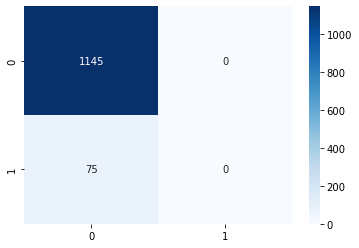

In [ ]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')


In [ ]:
# Try with a binary classifier
vector = CountVectorizer()

X = vector.fit_transform(df["arguments"])
y = df["actor_label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

print(label2id)

y = np.array([label2id[label] for label in y])

# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

KeyError: 'arguments'

In [ ]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.8750962851440776


<Axes: >

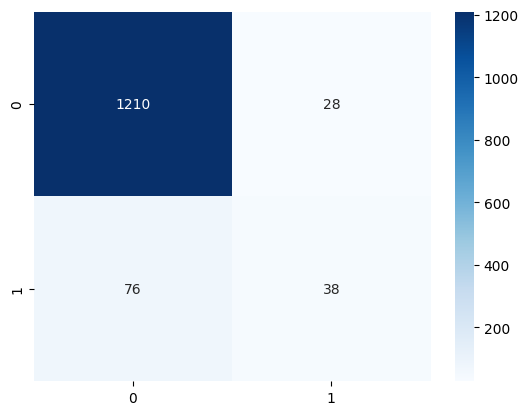

In [ ]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

## SVM